Objective:
The main objective of this project is to design and implement a robust data
preprocessing system that addresses common challenges such as missing values,
outliers, inconsistent formatting, and noise. By performing effective data preprocessing,
the project aims to enhance the quality, reliability, and usefulness of the data for
machine learning.
Dataset: Dataset for Data preprocessing
Key Components to be fulfilled:
Data Exploration: Explore the data, list down the unique values in each feature and find
its length. Perform the statistical analysis and renaming of the columns.
Data Cleaning:
Find the missing and inappropriate values, treat them appropriately. Remove all
duplicate rows. Find the outliers.
● Replace the value 0 in age as NaN
● Treat the null values in all columns using any measures(removing/ replace the
values with mean/median/mode)
Data Analysis:
● Filter the data with age >40 and salary<5000
● Plot the chart with age and salary
● Count the number of people from each place and represent it visually
Data Encoding:
Convert categorical variables into numerical representations using techniques such as
one-hot encoding, label encoding, making them suitable for analysis by machine
learning algorithms.
Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler
and minmaxscaler.
<a href="https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view" target="_blank" rel="noopener">Dataset</a>

https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('E:\ML\Employee.csv')
df


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


 This dataset contains 148 rows and 6 columns. 

In [26]:
print("The shape of this dataset is ",df.shape)

The shape of this dataset is  (148, 6)


In [27]:
print("No. of elements in this dataset is ",df.size)

No. of elements in this dataset is  888


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


Using info() function we can understand more about the dataset. Except 'Country' and 'Gender' all other columns have null values. 

In [29]:
for i in df.columns:
    print("Name of column : ",i)
    print("Unique values in the column ",i ," :",df[i].unique())
    print("Length of unique values in the column ",i," is " ,len(df[i].unique()))
    print("\n")


Name of column :  Company
Unique values in the column  Company  : ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values in the column  Company  is  7


Name of column :  Age
Unique values in the column  Age  : [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in the column  Age  is  30


Name of column :  Salary
Unique values in the column  Salary  : [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values in the column  Salary  is  41


Name of column :  Place
Unique values in the column  Place  : ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of u

Here we are renaming Company names because 'Tata Consultancy Services'and 'TCS','Congnizant' and 'CTS','Infosys Pvt Lmt' and 'Infosys' are same.

In [30]:
df['Company'] = df['Company'].map({'Tata Consultancy Services':'TCS','Congnizant': 'CTS','Infosys Pvt Lmt': 'Infosys'}).fillna(df['Company'])
print("Renamed Company names and value counts \n", df["Company"].value_counts())


Renamed Company names and value counts 
 Company
TCS        55
Infosys    47
CTS        38
Name: count, dtype: int64


I dropped column named 'Country' because there is only one unique column. So this column won't help to predict anything.

In [31]:
df.drop(columns='Country',inplace=True)

# Data Cleaning

In [32]:
df[df.duplicated()]

,Company,Age,Salary,Place,Gender
84,CTS,43.0,NaN,Mumbai,0
130,TCS,21.0,4824.0,Mumbai,0
131,Infosys,NaN,5835.0,Mumbai,0
144,Infosys,22.0,8787.0,Calcutta,1


In [33]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Company,Age,Salary,Place,Gender


Now dataset contains only 144 entries.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB


In [35]:
df.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


# IQR 

In [36]:
q1,q2,q3=df.Age.quantile([0.25,0.50,0.75]) #Q1,Q2,Q3
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))
IQR=q3-q1
print("IQR = ",IQR)
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))
df[(df["Age"]<LW)|(df["Age"]>UW)]

25 percentile = 22.0, 50 percentile = 33.0, 75 percentile = 37.5
IQR =  15.5
Lower Whisker = -1.25  Upper Whisker = 60.75


,Company,Age,Salary,Place,Gender


In [37]:
q1,q2,q3=df.Salary.quantile([0.25,0.50,0.75]) #Q1,Q2,Q3
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))
IQR=q3-q1
print("IQR = ",IQR)
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))
df[(df["Salary"]<LW)|(df["Salary"]>UW)]

25 percentile = 3030.0, 50 percentile = 5000.0, 75 percentile = 8000.0
IQR =  4970.0
Lower Whisker = -4425.0  Upper Whisker = 15455.0


,Company,Age,Salary,Place,Gender


No outliers found.

Replace the value 0 in age as NaN using replace() function.

In [38]:
print(df[df.Age==0])
df['Age'].replace(0,np.nan, inplace=True)


     Company  Age  Salary       Place  Gender
88   Infosys  0.0  3030.0    Calcutta       0
92       TCS  0.0  3045.0       Delhi       0
101      CTS  0.0  2034.0  Podicherry       0
107      TCS  0.0  9024.0     Chennai       1
111  Infosys  0.0  3234.0      Mumbai       0
121      CTS  0.0  1234.0    Calcutta       0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      121 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB


# Filling the null values.

In [40]:
df.describe()

,Age,Salary,Gender
count,121.000000,121.000000,144.000000
mean,32.041322,5283.471074,0.222222
std,8.989250,2585.373600,0.417191
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


C:\Users\Mathew\AppData\Local\Temp\ipykernel_4792\370126370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Salary,color='r')


<Axes: xlabel='Salary', ylabel='Density'>

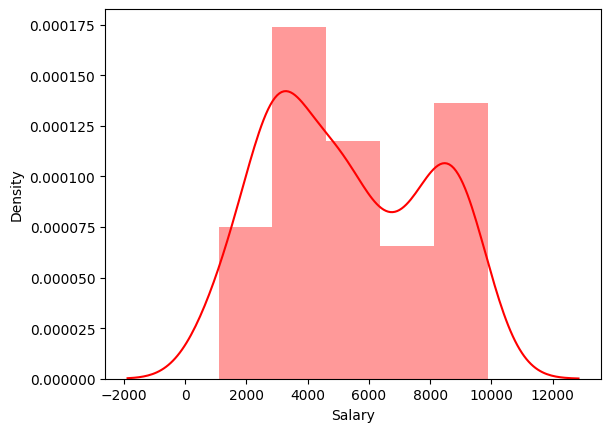

In [41]:
sns.distplot(df.Salary,color='r')

C:\Users\Mathew\AppData\Local\Temp\ipykernel_4792\2492600604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age,color='r')


<Axes: xlabel='Age', ylabel='Density'>

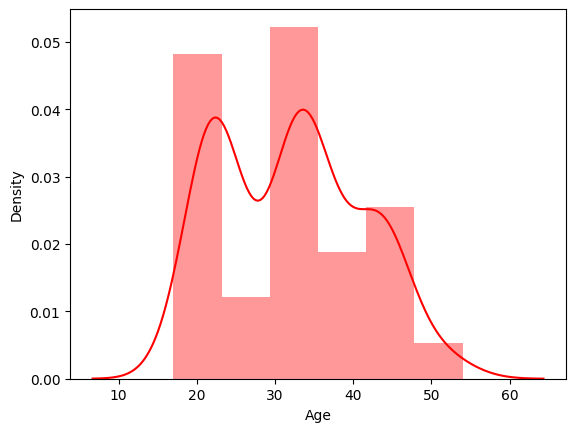

In [42]:
sns.distplot(df.Age,color='r')

Both 'company' and 'place' are categorical columns thats why we are filling the null values with the mode value . Then 'Salary' and 'Age' are numerical columns we have to check the distribution of data. We plotted distplot of both the columns from that we can conclude that its not normally distributed. Hence we fill the null values  with the median value.

In [49]:
C=df['Company'].mode()
P=df.Place.mode()

df=df.fillna(value={'Company':'TCS','Place':"Mumbai",'Salary':df.Salary.median(),'Age':df.Age.median()})
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB
None


Now this dataset contains no null values.

# Data Analysis

Filter the data with age >40 and salary<5000

In [50]:
df[(df.Age>40)&(df.Salary<5000)]

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


Plot the chart with age and salary

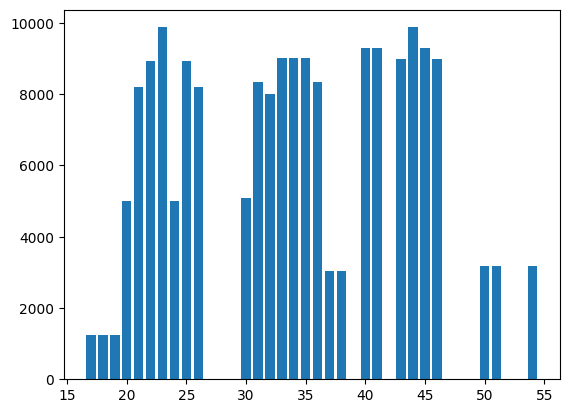

In [51]:
plt.bar(df.Age,df.Salary)
plt.show()

Count the number of people from each place and represent it visually

<Axes: xlabel='count', ylabel='Place'>

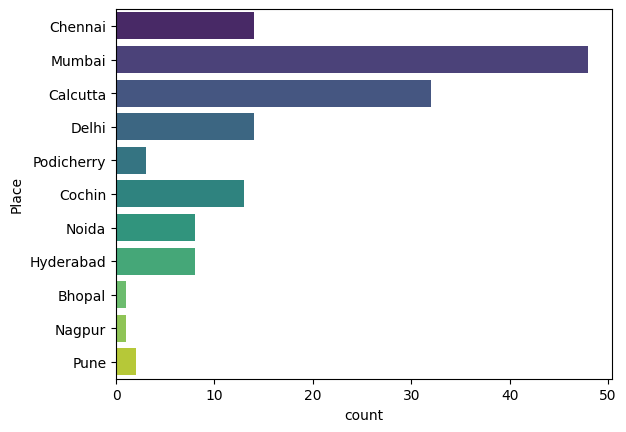

In [52]:
sns.countplot(y = 'Place', data = df, palette = 'viridis')

# Data Encoding

In [53]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Company", "Place"])

print(df_one_hot_encoded )

      Age  Salary  Gender  Company_CTS  Company_Infosys  Company_TCS  \
0    20.0  5000.0       0        False            False         True   
1    30.0  5000.0       0        False             True        False   
2    35.0  2300.0       0        False            False         True   
3    40.0  3000.0       0        False             True        False   
4    23.0  4000.0       0        False            False         True   
..    ...     ...     ...          ...              ...          ...   
142  22.0  8202.0       0        False             True        False   
143  33.0  9024.0       1        False            False         True   
145  44.0  4034.0       1        False             True        False   
146  33.0  5034.0       1        False            False         True   
147  22.0  8202.0       0        False             True        False   

     Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  \
0           False           False           True        

# # One hot Encoding

In [54]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ["Company", "Place"]
new_encoded_cols_names = []
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].sort_values().unique().tolist()]

one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)
print(df_one_hot_encoded)

     Company   Age  Salary     Place  Gender  is_CTS  is_Infosys  is_TCS  \
0        TCS  20.0  5000.0   Chennai       0     0.0         0.0     1.0   
1    Infosys  30.0  5000.0    Mumbai       0     0.0         1.0     0.0   
2        TCS  35.0  2300.0  Calcutta       0     0.0         0.0     1.0   
3    Infosys  40.0  3000.0     Delhi       0     0.0         1.0     0.0   
4        TCS  23.0  4000.0    Mumbai       0     0.0         0.0     1.0   
..       ...   ...     ...       ...     ...     ...         ...     ...   
142  Infosys  22.0  8202.0    Mumbai       0     0.0         0.0     1.0   
143      TCS  33.0  9024.0  Calcutta       1     0.0         1.0     0.0   
145  Infosys  44.0  4034.0     Delhi       1     NaN         NaN     NaN   
146      TCS  33.0  5034.0    Mumbai       1     NaN         NaN     NaN   
147  Infosys  22.0  8202.0    Cochin       0     NaN         NaN     NaN   

     is_Bhopal  is_Calcutta  is_Chennai  is_Cochin  is_Delhi  is_Hyderabad  \
0        

C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in df[["Company","Place"]]:
    df[i] = label_encoder.fit_transform(df[i])
df

,Company,Age,Salary,Place,Gender
0,2,20.0,5000.0,2,0
1,1,30.0,5000.0,6,0
2,2,35.0,2300.0,1,0
3,1,40.0,3000.0,4,0
4,2,23.0,4000.0,6,0
...,...,...,...,...,...
142,1,22.0,8202.0,6,0
143,2,33.0,9024.0,1,1
145,1,44.0,4034.0,4,1
146,2,33.0,5034.0,6,1


# Scaling

## Standard Scaler

In [56]:
from sklearn.preprocessing import StandardScaler


# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(2))

[[ 1.02 -1.48 -0.1  -0.89 -0.53]
 [-0.21 -0.27 -0.1   0.75 -0.53]
 [ 1.02  0.34 -1.24 -1.3  -0.53]
 [-0.21  0.95 -0.95 -0.07 -0.53]
 [ 1.02 -1.12 -0.52  0.75 -0.53]
 [-0.21  0.1  -0.1  -1.3  -0.53]
 [ 1.02  0.1   0.32 -0.89  1.87]
 [-0.21 -1.12  0.75  0.75  1.87]
 [ 1.02  0.22  1.17 -1.3   1.87]
 [-1.45  1.56  1.59 -0.07 -0.53]
 [-1.45 -1.12 -0.1   0.75 -0.53]
 [-1.45  0.22 -1.76 -1.3  -0.53]
 [-1.45  1.56 -0.1  -0.89 -0.53]
 [-1.45 -1.73 -1.69  0.75 -0.53]
 [-0.21  0.95 -0.95 -1.3  -0.53]
 [ 1.02 -1.12 -0.95 -0.07 -0.53]
 [-0.21 -1.12 -0.93  1.98 -0.53]
 [ 1.02  0.22 -0.1  -0.48 -0.53]
 [ 1.02 -1.24 -0.1  -0.89 -0.53]
 [-0.21 -0.02 -0.1   0.75 -0.53]
 [ 1.02  0.59 -0.93 -1.3  -0.53]
 [-0.21  2.17 -0.87 -0.07 -0.53]
 [ 1.02 -1.36 -0.18  0.75 -0.53]
 [-0.21  0.1   0.25 -0.48 -0.53]
 [ 1.02  0.1   0.78 -0.89  1.87]
 [-0.21 -1.12  1.57  0.75  1.87]
 [ 1.02  0.22  1.32 -1.3   1.87]
 [-1.45  1.56  1.71 -0.07  1.87]
 [-1.45 -1.12  1.96  0.75  1.87]
 [-1.45  0.34 -1.36 -0.48 -0.53]
 [-1.45  1

## MinMax Scaler 

In [57]:
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(1))

[[1.  0.1 0.4 0.2 0. ]
 [0.5 0.4 0.4 0.6 0. ]
 [1.  0.5 0.1 0.1 0. ]
 [0.5 0.6 0.2 0.4 0. ]
 [1.  0.2 0.3 0.6 0. ]
 [0.5 0.4 0.4 0.1 0. ]
 [1.  0.4 0.6 0.2 1. ]
 [0.5 0.2 0.7 0.6 1. ]
 [1.  0.5 0.8 0.1 1. ]
 [0.  0.8 0.9 0.4 0. ]
 [0.  0.2 0.4 0.6 0. ]
 [0.  0.5 0.  0.1 0. ]
 [0.  0.8 0.4 0.2 0. ]
 [0.  0.  0.  0.6 0. ]
 [0.5 0.6 0.2 0.1 0. ]
 [1.  0.2 0.2 0.4 0. ]
 [0.5 0.2 0.2 0.9 0. ]
 [1.  0.5 0.4 0.3 0. ]
 [1.  0.1 0.4 0.2 0. ]
 [0.5 0.4 0.4 0.6 0. ]
 [1.  0.5 0.2 0.1 0. ]
 [0.5 0.9 0.2 0.4 0. ]
 [1.  0.1 0.4 0.6 0. ]
 [0.5 0.4 0.5 0.3 0. ]
 [1.  0.4 0.7 0.2 1. ]
 [0.5 0.2 0.9 0.6 1. ]
 [1.  0.5 0.8 0.1 1. ]
 [0.  0.8 0.9 0.4 1. ]
 [0.  0.2 1.  0.6 1. ]
 [0.  0.5 0.1 0.3 0. ]
 [0.  0.8 0.7 0.2 0. ]
 [0.  0.1 0.2 0.6 0. ]
 [0.5 0.8 0.3 0.1 0. ]
 [1.  0.5 0.4 0.6 0. ]
 [0.5 0.2 0.8 0.6 0. ]
 [1.  0.5 0.9 0.6 1. ]
 [1.  0.4 0.4 0.8 0. ]
 [1.  0.5 0.4 0.5 0. ]
 [1.  0.5 0.1 0.1 0. ]
 [0.5 0.6 0.2 0.6 0. ]
 [1.  0.2 0.4 0.1 0. ]
 [0.5 0.4 0.4 0.6 0. ]
 [1.  0.4 0.6 0.6 0. ]
 [0.5 0.2 0